In [1]:
from dieboldmariano import dm_test
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the predictions from the CSV file

# Baseline Models 
predictions_baseline = pd.read_csv("Results/model_predictions.csv (252-window).csv")
predictions_baseline['DlyCalDt'] = pd.to_datetime(predictions_baseline['DlyCalDt'])

predictions_baseline.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)

predictions_linear = predictions_baseline.copy()
predictions_linear = predictions_baseline.drop(columns=['RF','NN1','NN2','NN3','NN4','NN5','GBRT'])
predictions_nonlinear = predictions_baseline.copy()
predictions_nonlinear = predictions_baseline.drop(columns=['Ridge','OLS','ElasticNet','Lasso','GLM'])

predictions_baseline

,PERMNO,DlyCalDt,ExcessReturn,Ridge,OLS,ElasticNet,Lasso,GLM,RF,NN1,NN2,NN3,NN4,NN5,GBRT
0,10138,2016-01-04,-0.018191,-0.004143,-0.004143,0.000625,0.000674,-0.004177,0.000407,0.000203,-0.001111,0.003457,-0.000512,-0.001845,0.000427
1,17778,2016-01-04,-0.007616,-0.002580,-0.002580,0.000221,0.000626,-0.002273,0.000407,-0.000076,-0.001869,-0.000127,-0.003375,0.003059,0.000589
2,28388,2016-01-04,-0.015413,-0.005698,-0.005698,0.000952,0.000927,-0.005601,0.000407,-0.000602,0.000429,0.004015,0.003381,0.002248,0.000605
3,34746,2016-01-04,-0.027370,-0.002167,-0.002167,0.000934,0.000713,-0.001459,0.000407,0.002295,0.001252,-0.001708,-0.002360,0.000976,0.000526
4,35044,2016-01-04,-0.016674,-0.001958,-0.001958,0.000539,0.000568,-0.001318,0.000407,0.005719,-0.001486,0.000512,-0.001868,-0.006880,-0.000223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112395,86455,2024-12-31,0.000924,0.001271,0.001271,0.001255,0.000782,0.001768,0.000407,0.000248,0.001173,0.001490,0.006603,0.002606,0.000568
112396,86755,2024-12-31,-0.008607,0.002545,0.002545,0.001563,0.000819,0.002505,0.000407,0.000234,0.002670,0.000081,0.002524,-0.006526,0.000482
112397,86868,2024-12-31,-0.001733,0.002049,0.002049,0.001675,0.000730,0.002527,0.000407,-0.001945,0.006323,-0.000144,-0.002800,-0.002743,0.000613
112398,87267,2024-12-31,-0.002370,0.004601,0.004601,0.001591,0.001018,0.003958,0.000407,0.002246,0.005726,0.000434,0.010393,-0.001660,0.000736


In [3]:
y_true = np.array(predictions_linear['ExcessReturn'])

y_lasso = np.array(predictions_linear['Lasso'])
y_ols = np.array(predictions_linear['OLS'])
y_ridge = np.array(predictions_linear['Ridge'])
y_elasticnet = np.array(predictions_linear['ElasticNet'])   
y_glm = np.array(predictions_linear['GLM'])

# Comparing elastic net with other models using the Diebold-Mariano test
stat1, p_value1 = dm_test(y_true, y_elasticnet, y_ols, h=1)
print(f"Diebold-Mariano test statistic: {stat1}, p-value: {p_value1}")
stat2, p_value2 = dm_test(y_true, y_elasticnet, y_ridge, h=1)
print(f"Diebold-Mariano test statistic: {stat2}, p-value: {p_value2}")
stat3, p_value3 = dm_test(y_true, y_elasticnet, y_lasso, h=1)
print(f"Diebold-Mariano test statistic: {stat3}, p-value: {p_value3}")
stat4, p_value4 = dm_test(y_true, y_elasticnet, y_glm, h=1)
print(f"Diebold-Mariano test statistic: {stat4}, p-value: {p_value4}")

# Comparing linear models with each other using the Diebold-Mariano test
stat5, p_value5 = dm_test(y_true, y_ridge, y_lasso, h=1)
print(f"Diebold-Mariano test statistic: {stat5}, p-value: {p_value5}")
stat6, p_value6 = dm_test(y_true, y_ridge, y_glm, h=1)
print(f"Diebold-Mariano test statistic: {stat6}, p-value: {p_value6}")
stat7, p_value7 = dm_test(y_true, y_ridge, y_elasticnet, h=1)
print(f"Diebold-Mariano test statistic: {stat7}, p-value: {p_value7}")
stat8, p_value8 = dm_test(y_true, y_ridge, y_ols, h=1)
print(f"Diebold-Mariano test statistic: {stat8}, p-value: {p_value8}")
stat9, p_value9 = dm_test(y_true, y_lasso, y_glm, h=1)
print(f"Diebold-Mariano test statistic: {stat9}, p-value: {p_value9}")
stat10, p_value10 = dm_test(y_true, y_lasso, y_elasticnet, h=1)
print(f"Diebold-Mariano test statistic: {stat10}, p-value: {p_value10}")
stat11, p_value11 = dm_test(y_true, y_lasso, y_ols, h=1)
print(f"Diebold-Mariano test statistic: {stat11}, p-value: {p_value11}")    
stat12, p_value12 = dm_test(y_true, y_lasso, y_ridge, h=1)
print(f"Diebold-Mariano test statistic: {stat12}, p-value: {p_value12}")   
stat13, p_value13 = dm_test(y_true, y_ols, y_glm, h=1)
print(f"Diebold-Mariano test statistic: {stat13}, p-value: {p_value13}")    
stat14, p_value14 = dm_test(y_true, y_ols, y_elasticnet, h=1)
print(f"Diebold-Mariano test statistic: {stat14}, p-value: {p_value14}")
stat15, p_value15 = dm_test(y_true, y_ols, y_ridge, h=1)
print(f"Diebold-Mariano test statistic: {stat15}, p-value: {p_value15}")
stat16, p_value16 = dm_test(y_true, y_ols, y_lasso, h=1)
print(f"Diebold-Mariano test statistic: {stat16}, p-value: {p_value16}")




Diebold-Mariano test statistic: -31.302735232303988, p-value: 3.5952758531455948e-214
Diebold-Mariano test statistic: -31.302735079017452, p-value: 3.595292972669433e-214
Diebold-Mariano test statistic: 3.372380587898766, p-value: 0.0007454648573477456
Diebold-Mariano test statistic: -31.89565944687229, p-value: 3.036792199537967e-222
Diebold-Mariano test statistic: 25.98757035188907, p-value: 1.8855555862045065e-148
Diebold-Mariano test statistic: 8.897993582465368, p-value: 5.768352467798951e-19
Diebold-Mariano test statistic: 31.302735079017452, p-value: 3.595292972669433e-214
Diebold-Mariano test statistic: -19.32774720693316, p-value: 4.284575251910318e-83
Diebold-Mariano test statistic: -26.27271763530033, p-value: 1.1333898722154083e-151
Diebold-Mariano test statistic: -3.372380587898766, p-value: 0.0007454648573477456
Diebold-Mariano test statistic: -25.987570510581524, p-value: 1.885547845166954e-148
Diebold-Mariano test statistic: -25.98757035188907, p-value: 1.88555558620450

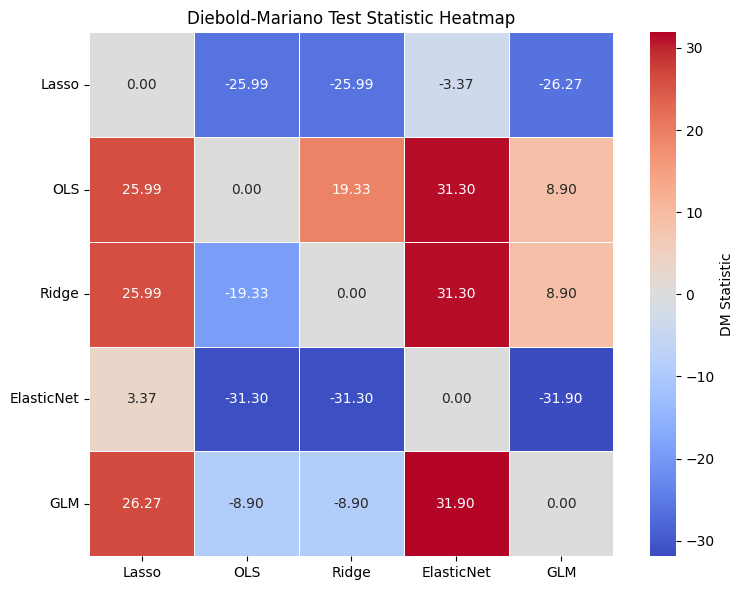

In [4]:
# === Step 1: Collect model predictions ===
linear_model_preds = {
    'Lasso': np.array(predictions_linear['Lasso']),
    'OLS': np.array(predictions_linear['OLS']),
    'Ridge': np.array(predictions_linear['Ridge']),
    'ElasticNet': np.array(predictions_linear['ElasticNet']),
    'GLM': np.array(predictions_linear['GLM'])
}

model_names = list(linear_model_preds.keys())
n = len(model_names)

# === Step 2: Create a DM statistic matrix ===
dm_matrix = np.zeros((n, n))  # DM statistic matrix

y_true = np.array(predictions_linear['ExcessReturn'])

for i in range(n):
    for j in range(n):
        if i == j:
            dm_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, linear_model_preds[model_names[i]], linear_model_preds[model_names[j]], h=1)
            dm_matrix[i, j] = stat

# === Step 3: Convert to DataFrame for plotting ===
dm_df = pd.DataFrame(dm_matrix, index=model_names, columns=model_names)

# === Step 4: Plot heatmap ===
plt.figure(figsize=(8, 6))
sns.heatmap(dm_df, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"label": "DM Statistic"})
plt.title("Diebold-Mariano Test Statistic Heatmap")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

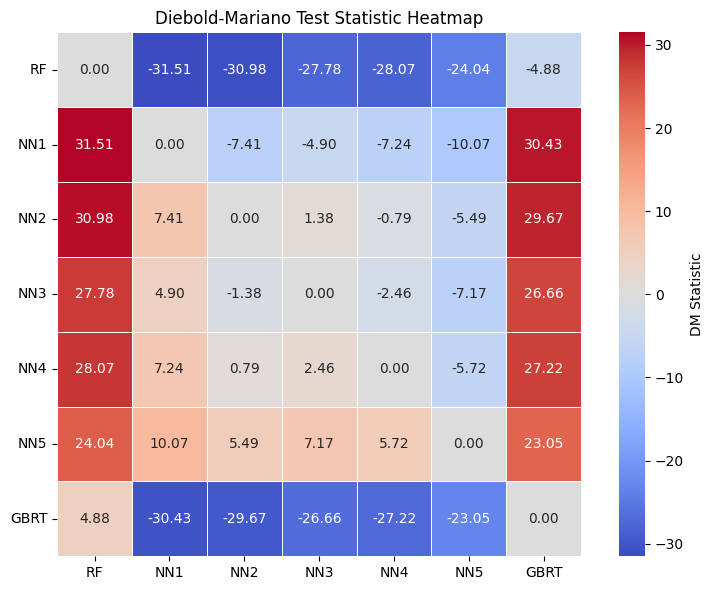

In [5]:
nonlinear_model_preds = {
    'RF': np.array(predictions_nonlinear['RF']),
    'NN1': np.array(predictions_nonlinear['NN1']),
    'NN2': np.array(predictions_nonlinear['NN2']),      
    'NN3': np.array(predictions_nonlinear['NN3']),
    'NN4': np.array(predictions_nonlinear['NN4']),
    'NN5': np.array(predictions_nonlinear['NN5']),
    'GBRT': np.array(predictions_nonlinear['GBRT'])
}

model_names = list(nonlinear_model_preds.keys())
n = len(model_names)

dm_matrix = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i == j:
            dm_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, nonlinear_model_preds[model_names[i]], nonlinear_model_preds[model_names[j]], h=1)
            dm_matrix[i, j] = stat

dm_df = pd.DataFrame(dm_matrix, index=model_names, columns=model_names)

# === Step 4: Plot heatmap ===
plt.figure(figsize=(8, 6))
sns.heatmap(dm_df, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"label": "DM Statistic"})
plt.title("Diebold-Mariano Test Statistic Heatmap")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
# Comparing linear and nonlinear models using the Diebold-Mariano test

predictions_chronos = pd.read_csv("Results/chronos(252-day).csv")
predictions_chronos['DlyCalDt'] = pd.to_datetime(predictions_chronos['DlyCalDt'])

predictions_chronos.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)

chronos_models_preds = {
    'chr_bolt_tiny': np.array(predictions_chronos['y_chr_bolt_tiny']),
    'chr_bolt_mini': np.array(predictions_chronos['y_chr_bolt_mini']),
    'chr_bolt_small': np.array(predictions_chronos['y_chr_bolt_small']),
    'chr_bolt_base': np.array(predictions_chronos['y_chr_bolt_base']),
    'chr_t5_tiny': np.array(predictions_chronos['y_chr_t5_tiny']),
    'chr_t5_mini': np.array(predictions_chronos['y_chr_t5_mini']),
    'chr_t5_small': np.array(predictions_chronos['y_chr_t5_small'])
}

chronos_models = list(chronos_models_preds.keys())
n = len(chronos_models)

In [7]:
predictions_chronos

,PERMNO,ExcessReturn,DlyCalDt,y_chr_bolt_tiny,y_chr_bolt_mini,y_chr_bolt_small,y_chr_bolt_base,y_chr_t5_tiny,y_chr_t5_mini,y_chr_t5_small
0,10138,-0.018191,2016-01-04,-0.002691,-0.002005,-0.001564,-0.001689,0.003099,0.001360,0.001157
1,17778,-0.007616,2016-01-04,-0.001013,-0.000986,-0.001041,-0.001370,-0.001333,-0.000048,-0.001620
2,28388,-0.015413,2016-01-04,-0.000125,0.000057,0.000284,0.000514,0.002055,0.000463,0.000587
3,34746,-0.027370,2016-01-04,0.000479,0.000209,0.000553,0.000131,0.002393,0.002728,0.002003
4,35044,-0.016674,2016-01-04,-0.001174,-0.001160,-0.000225,-0.000914,0.002093,0.001914,0.000308
...,...,...,...,...,...,...,...,...,...,...
112395,86455,0.000924,2024-12-31,-0.000508,0.000448,0.000731,0.000555,0.000564,-0.001260,0.001696
112396,86755,-0.008607,2024-12-31,0.000472,0.001227,0.000896,0.001230,0.002860,0.002112,0.000996
112397,86868,-0.001733,2024-12-31,0.000582,0.001365,0.001620,0.001149,0.002565,0.000939,0.000575
112398,87267,-0.002370,2024-12-31,-0.001364,0.000981,-0.000135,0.000299,0.000366,-0.003324,0.000023


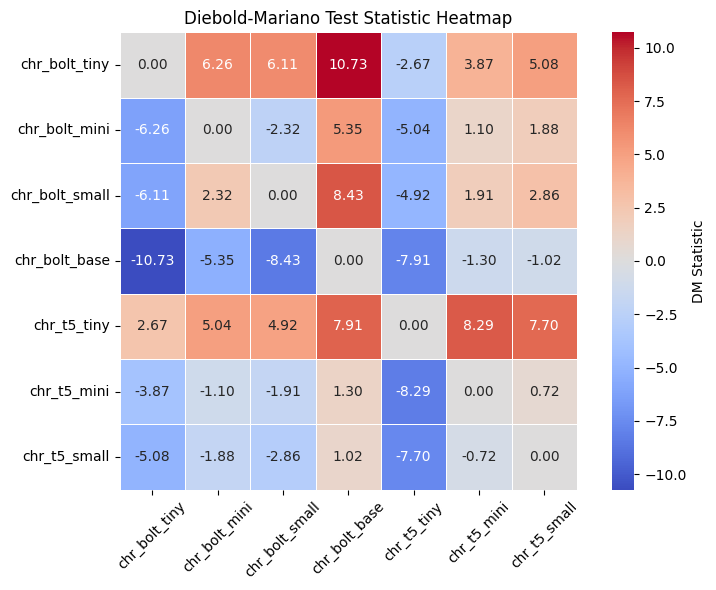

In [8]:
chronos_matrix = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        if i == j:
            chronos_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, chronos_models_preds[chronos_models[i]], chronos_models_preds[chronos_models[j]], h=1)
            chronos_matrix[i, j] = stat

chronos_df = pd.DataFrame(chronos_matrix, index=chronos_models, columns=chronos_models)

# === Step 4: Plot heatmap ===
plt.figure(figsize=(8, 6))
sns.heatmap(chronos_df, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"label": "DM Statistic"})
plt.title("Diebold-Mariano Test Statistic Heatmap")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Comparing linear and nonlinear models using the Diebold-Mariano test

predictions_timesfm = pd.read_csv("Results/timesfm(252-day).csv")
predictions_timesfm['DlyCalDt'] = pd.to_datetime(predictions_timesfm['DlyCalDt'])

predictions_timesfm.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)

timesfm_models_preds = {
    'tfm1': np.array(predictions_timesfm['y_tfm1']),
    'tfm2': np.array(predictions_timesfm['y_tfm2'])
}
timesfm_models = list(timesfm_models_preds.keys())
n = len(timesfm_models)

timesfm_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            timesfm_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, timesfm_models_preds[timesfm_models[i]], timesfm_models_preds[timesfm_models[j]], h=1)
            timesfm_matrix[i, j] = stat

timesfm_df = pd.DataFrame(timesfm_matrix, index=timesfm_models, columns=timesfm_models)

timesfm_df

,tfm1,tfm2
tfm1,0.000000,-78.173521
tfm2,78.173521,0.000000


In [10]:
# Comparing linear and nonlinear models using the Diebold-Mariano test

predictions_uni2ts = pd.read_csv("Results/uni2ts(252-day)predictions.csv")
predictions_uni2ts['DlyCalDt'] = pd.to_datetime(predictions_uni2ts['DlyCalDt'])

predictions_uni2ts.sort_values(by=["DlyCalDt", "PERMNO"], inplace=True, ignore_index=True)

uni2ts_models_preds = {
    'moirai_s': np.array(predictions_uni2ts['y_moirai_s']),
    'moirai_moe_s': np.array(predictions_uni2ts['y_moirai_moe_s']),
    'moirai_moe_b': np.array(predictions_uni2ts['y_moirai_moe_b'])
}
uni2ts_models = list(uni2ts_models_preds.keys())
n = len(uni2ts_models)

uni2ts_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            uni2ts_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, uni2ts_models_preds[uni2ts_models[i]], uni2ts_models_preds[uni2ts_models[j]], h=1)
            uni2ts_matrix[i, j] = stat

uni2ts_df = pd.DataFrame(uni2ts_matrix, index=uni2ts_models, columns=uni2ts_models)

uni2ts_df

,moirai_s,moirai_moe_s,moirai_moe_b
moirai_s,0.000000,1.445042,1.444044
moirai_moe_s,-1.445042,0.000000,-5.455258
moirai_moe_b,-1.444044,5.455258,0.000000


In [11]:
# Comparing all the models with each other 

all_models_preds = {
    **linear_model_preds,
    **nonlinear_model_preds,
    **chronos_models_preds,
    **timesfm_models_preds,
    **uni2ts_models_preds
    
}
model_names = list(all_models_preds.keys())
n = len(model_names)

dm_matrix = np.zeros((n, n))  # DM statistic matrix
y_true = np.array(predictions_linear['ExcessReturn'])

for i in range(n):
    for j in range(n):
        if i == j:
            dm_matrix[i, j] = 0
        else:
            stat, _ = dm_test(y_true, all_models_preds[model_names[i]], all_models_preds[model_names[j]], h=1)
            dm_matrix[i, j] = stat

dm_df = pd.DataFrame(dm_matrix, index=model_names, columns=model_names)
dm_df
# === Step 3: Convert to DataFrame for plotting ===

,Lasso,OLS,Ridge,ElasticNet,GLM,RF,NN1,NN2,NN3,NN4,...,chr_bolt_small,chr_bolt_base,chr_t5_tiny,chr_t5_mini,chr_t5_small,tfm1,tfm2,moirai_s,moirai_moe_s,moirai_moe_b
Lasso,0.000000,-25.987571,-25.987570,-3.372381,-26.272718,1.855840,-31.796252,-31.523197,-27.928345,-27.845669,...,-8.847110,-6.776322,-13.087977,-7.695252,-8.825773,-13.159239,-70.232812,-1.445847,-19.135244,-9.625272
OLS,25.987571,0.000000,19.327747,31.302735,8.897995,27.140213,-19.590286,-21.834609,-19.710062,-20.840987,...,1.628742,4.912833,-2.965127,3.688257,4.843844,-3.642920,-65.174374,-1.445578,-12.371178,-8.174967
Ridge,25.987570,-19.327747,0.000000,31.302735,8.897994,27.140212,-19.590286,-21.834609,-19.710062,-20.840987,...,1.628742,4.912833,-2.965127,3.688256,4.843843,-3.642920,-65.174374,-1.445578,-12.371178,-8.174967
ElasticNet,3.372381,-31.302735,-31.302735,0.000000,-31.895659,3.916307,-31.157647,-30.825159,-27.682367,-27.875026,...,-7.781114,-5.715762,-12.130296,-6.801510,-7.584473,-12.025960,-69.047097,-1.445836,-18.796965,-9.563202
GLM,26.272718,-8.897995,-8.897994,31.895659,0.000000,27.050666,-20.321181,-22.415655,-20.055384,-21.121616,...,1.244873,4.554967,-3.403118,3.298638,4.424585,-4.062414,-65.553231,-1.445590,-12.698046,-8.243004
RF,-1.855840,-27.140213,-27.140212,-3.916307,-27.050666,0.000000,-31.510655,-30.979232,-27.776757,-28.067073,...,-8.510923,-6.649959,-12.767298,-7.491825,-8.484375,-12.644468,-69.619242,-1.445856,-19.220860,-9.668723
NN1,31.796252,19.590286,19.590286,31.157647,20.321181,31.510655,0.000000,-7.410745,-4.903162,-7.242918,...,15.250370,19.699812,10.359304,17.867257,19.873409,8.769675,-62.344346,-1.445136,-1.978489,-5.787278
NN2,31.523197,21.834609,21.834609,30.825159,22.415655,30.979232,7.410745,0.000000,1.383022,-0.791972,...,20.609608,24.205338,14.731261,22.528975,24.443533,14.394670,-60.558309,-1.444915,2.468289,-4.591797
NN3,27.928345,19.710062,19.710062,27.682367,20.055384,27.776757,4.903162,-1.383022,0.000000,-2.457095,...,16.133190,18.593167,11.875702,17.367242,19.502782,11.159024,-58.170643,-1.444970,1.379761,-4.873114
NN4,27.845669,20.840987,20.840987,27.875026,21.121616,28.067073,7.242918,0.791972,2.457095,0.000000,...,16.730879,19.453927,13.217270,18.542965,20.233660,12.061575,-55.798106,-1.444884,2.890756,-4.408248


In [12]:
dm_df.to_csv("Results/DM_Test_Results.csv")

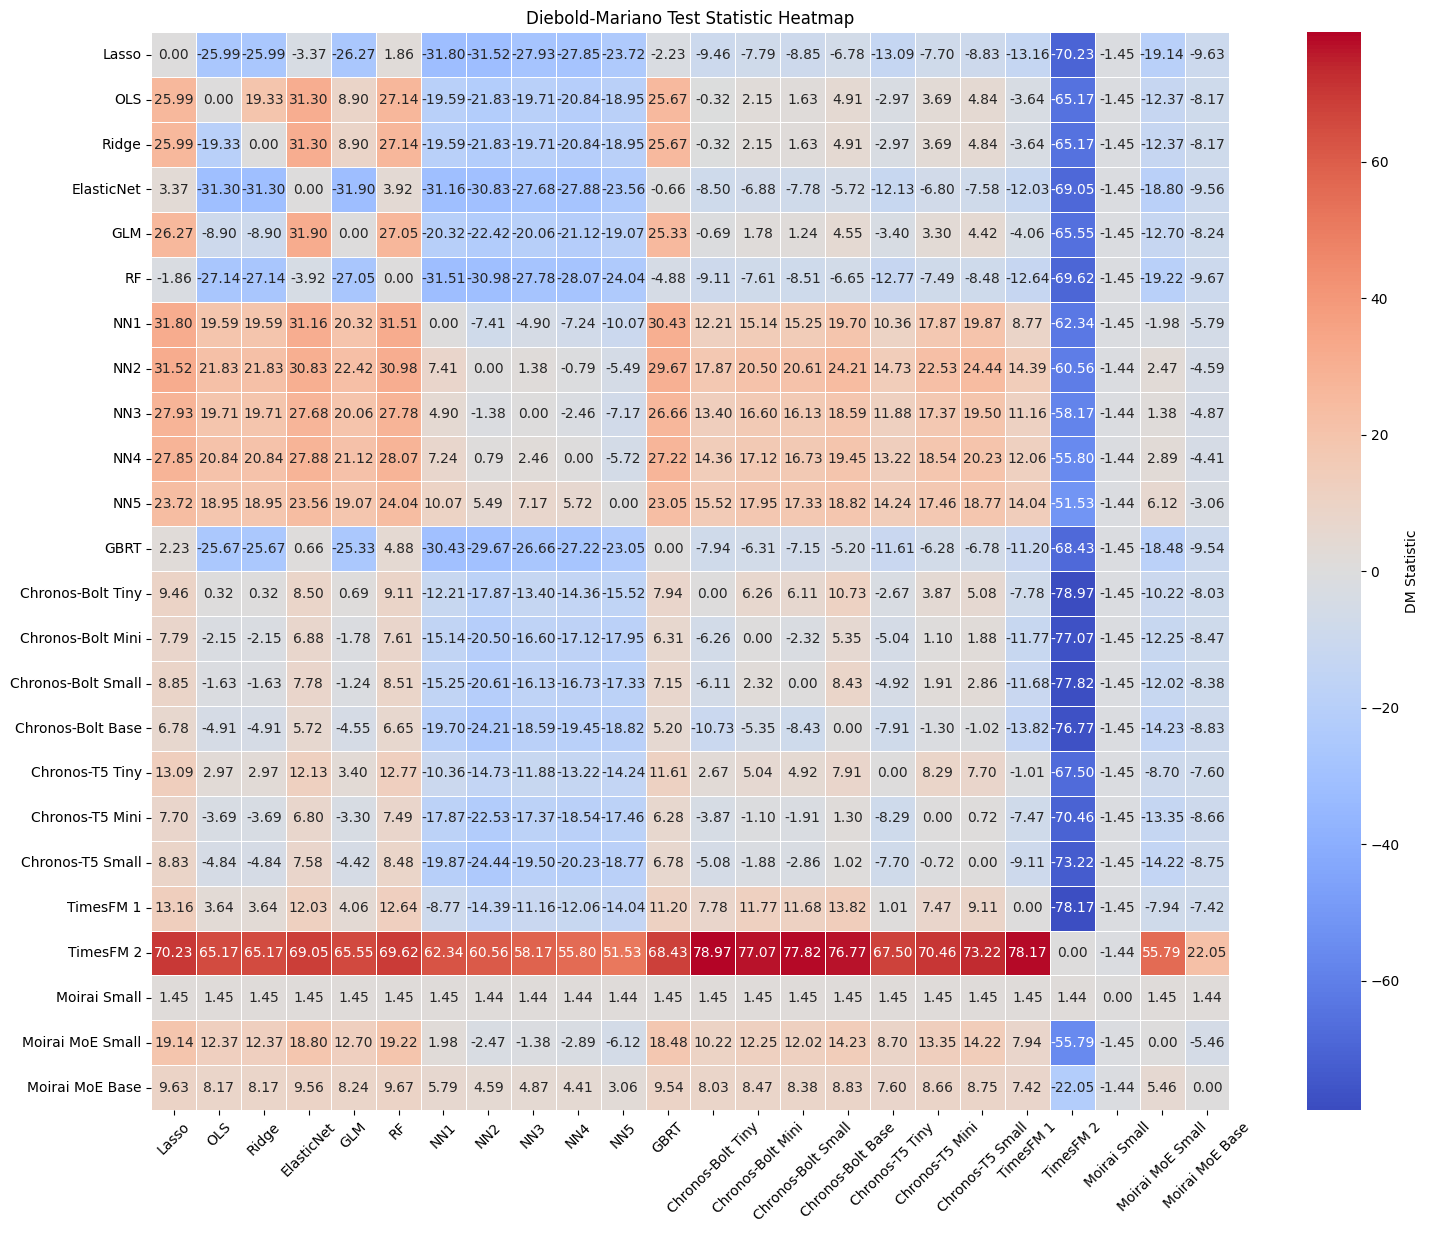

In [13]:
# === Step 4: Plot heatmap ===

model_name_map = {
    'chr_bolt_tiny': 'Chronos-Bolt Tiny',
    'chr_bolt_mini': 'Chronos-Bolt Mini',
    'chr_bolt_small': 'Chronos-Bolt Small',
    'chr_bolt_base': 'Chronos-Bolt Base',
    'chr_t5_tiny': 'Chronos-T5 Tiny',
    'chr_t5_mini': 'Chronos-T5 Mini',
    'chr_t5_small': 'Chronos-T5 Small',
    'moirai_s': 'Moirai Small',
    'moirai_moe_s': 'Moirai MoE Small',
    'moirai_moe_b': 'Moirai MoE Base',
    'tfm1': 'TimesFM 1',
    'tfm2': 'TimesFM 2',
    'RF': 'RF',
    'GBRT': 'GBRT',
    'NN1': 'NN1',
    'NN2': 'NN2',
    'NN3': 'NN3',
    'NN4': 'NN4',
    'NN5': 'NN5',
    'Lasso': 'Lasso',
    'OLS': 'OLS',
    'Ridge': 'Ridge',
    'ElasticNet': 'ElasticNet',
    'GLM': 'GLM'
}

dm_df = dm_df.rename(index=model_name_map, columns=model_name_map)

plt.figure(figsize=(20, 14))
sns.heatmap(dm_df, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, square=True, cbar_kws={"label": "DM Statistic"})
plt.title("Diebold-Mariano Test Statistic Heatmap")
plt.yticks(rotation=0)
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()